### Curso de Python do Maurão
#### Aula 1 - Análise de dados com Python


#####  **Objetivos:** 

 - Usar os recursos de análise de covariância em uma base de dados conhecida
 - Explorar as funcionalidades de gráficos de diferentes 
 - Análise de correlação


#### Descrição dos dados utilizados

Essa base de dados (chamada Iris) foi coletada em 1936 e publicada num paper descrevendo-a, bem como a um modelo linear que foi elaborado para descrevê-la.

Mais informações: https://en.wikipedia.org/wiki/Iris_flower_data_set

O dado consiste de 150 observações, um terço de cada espécie, e serão feitas várias análises abaixo.

Referências:

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png
https://machinelearningmastery.com/

https://www.kaggle.com/benhamner


1) Carregando as bibliotecas a serem usadas (instaladas pelo Anaconda)

In [1]:
import pandas

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

2) Configurações do ambiente

In [2]:
%matplotlib inline
sns.set(style="white", color_codes=True)

3) Obtendo os dados a serem analisados

In [4]:
diretorio = r"../data/iris.csv"
iris = pandas.read_csv(diretorio)

4) Espiando ...

In [5]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.tail()

,sepal-length,sepal-width,petal-length,petal-width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris.head(20)

4) Usando groupby para analisar as classes

In [7]:
iris.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

5) Boxplots

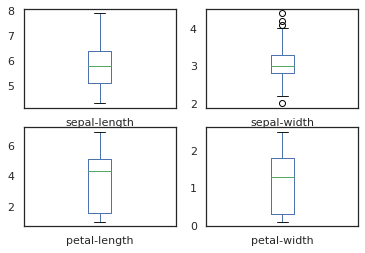

In [8]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

6) Histogramas

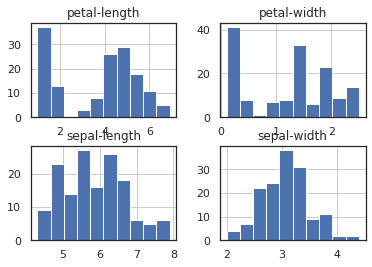

In [9]:
iris.hist()
plt.show()

7) Matrix scatter

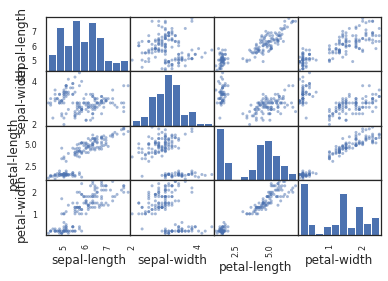

In [10]:
scatter_matrix(iris)
plt.show()

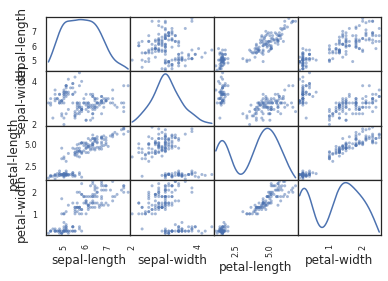

In [11]:
scatter_matrix(iris, diagonal='kde')
plt.show()

8) Analisando mais de perto uma das correlações

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


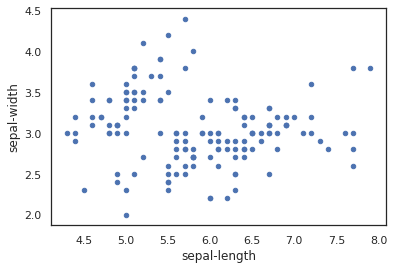

In [12]:
iris.plot(kind="scatter", x="sepal-length", y="sepal-width")

9) Usando a seaborn, outra lib de gráficos

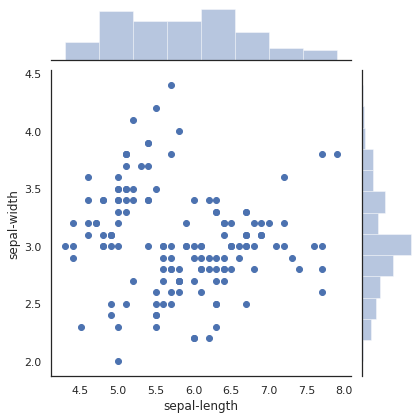

In [13]:
sns.jointplot(x="sepal-length", y="sepal-width", data=iris, height=6)

10) Colorindo os grupos, adicionando legenda...

/opt/anaconda/anaconda3/envs/curso_datascience/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


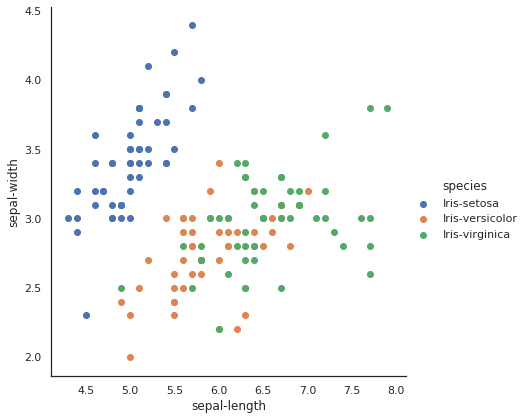

In [14]:
sns.FacetGrid(iris, hue="species", size=6) \
   .map(plt.scatter, "sepal-length", "sepal-width") \
   .add_legend()

11) Comparando-se os boxplots, dá pra chegar a uma conclusão interessante...

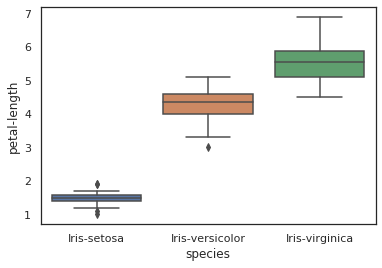

In [15]:
sns.boxplot(x="species", y="petal-length", data=iris)

12) Adicionando os pontos ao gráfico. Como são poucos pontos, isso faz sentido.O parâmetro "jitter" tira os pontos da mesma linha, melhorando a visualização.

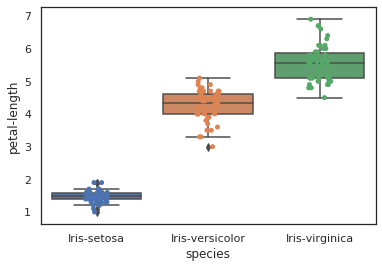

In [16]:
ax = sns.boxplot(x="species", y="petal-length", data=iris)
ax = sns.stripplot(x="species", y="petal-length", data=iris, jitter=True)

13) E elas estão de volta!!!

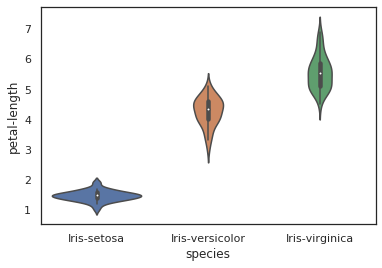

In [17]:
sns.violinplot(x="species", y="petal-length", data=iris, size=6)

13) Pode-se usar a estimativa de densidade de núcleo (kde) para analisar os dados. A mesma conclusão do item 11 pode ser evidenciada aqui.

/opt/anaconda/anaconda3/envs/curso_datascience/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


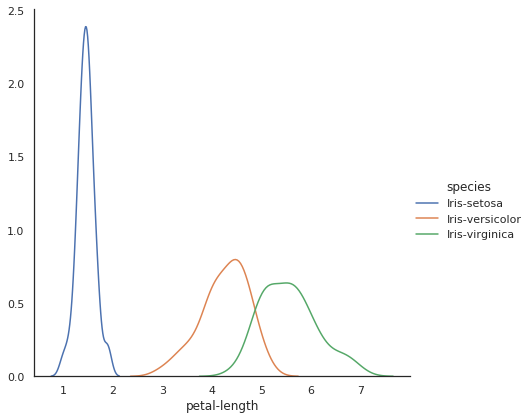

In [18]:
sns.FacetGrid(iris, hue="species", size=6) \
   .map(sns.kdeplot, "petal-length") \
   .add_legend()

14) Esse é o pairplot, que mostra a relação de bivariância entre cada par de variaveis do dataset.

/opt/anaconda/anaconda3/envs/curso_datascience/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


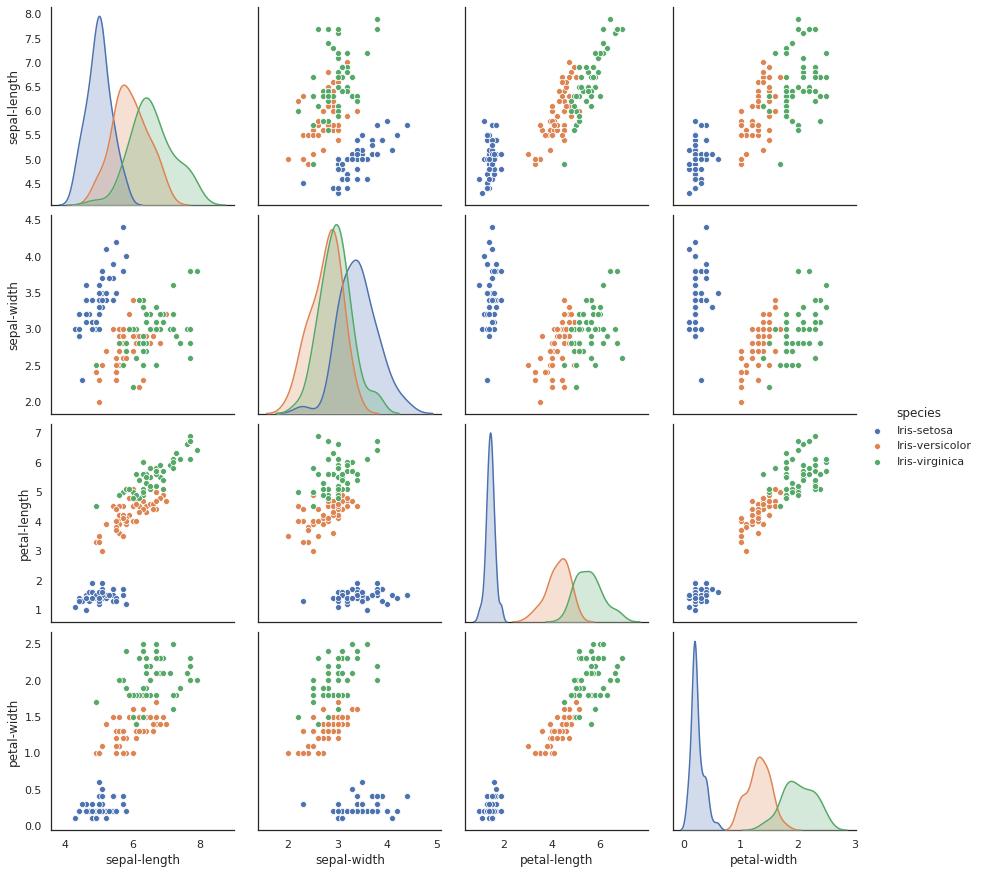

In [19]:
sns.pairplot(iris, hue="species", size=3)

15) Pode-se adicionar uma regressão linear aos plots

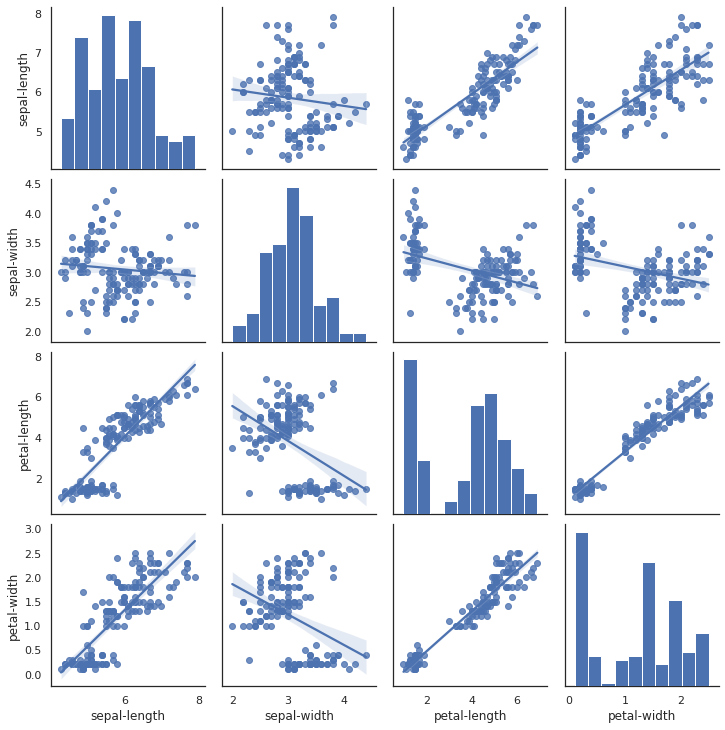

In [20]:
sns.pairplot(iris, kind="reg")

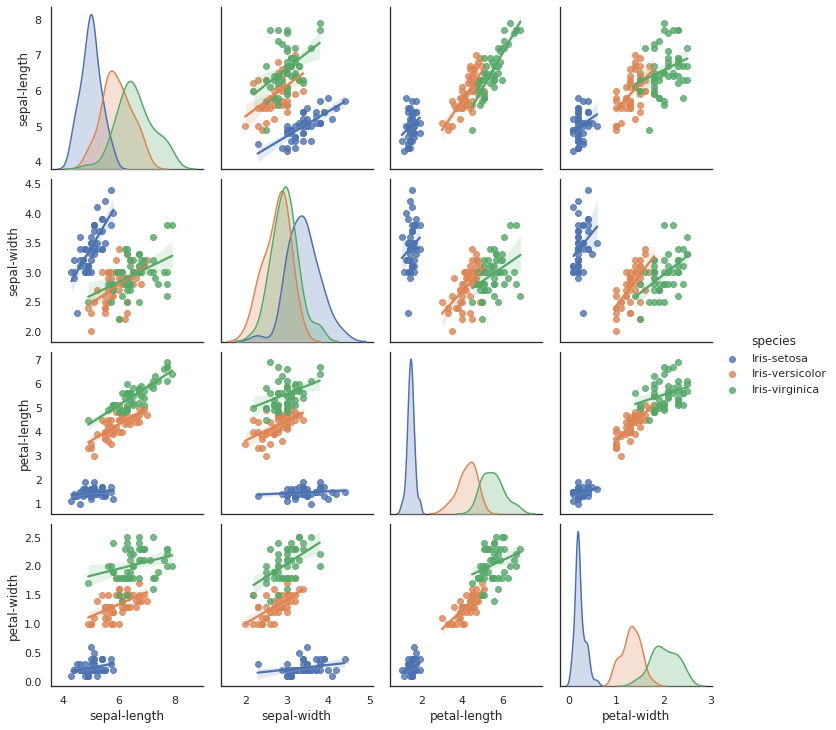

In [21]:
sns.pairplot(iris, hue="species", kind="reg")

### Machine learning

De agora em diante, vamos explorar recursos de machine learning para tentar entender as relações entre as variáveis a classe das espécies.

16) Salvando os valores a serem processados nas analises. A biblioteca scikit-learn usa numpy arrays.

In [22]:
array = iris.values
print(type(array))

<class 'numpy.ndarray'>


In [23]:
print(array.shape)
print(array)

(150, 5)
[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 

16) Isolando Iris-setosa

In [24]:
raw_target = array[:,4]
print(raw_target)
y = np.where(raw_target == 'Iris-setosa', 1, 0)
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [25]:
X = array[:,0:4]
X.shape

(150, 4)

17) Algoritmos de machine learning normalmente exigem que se tenha um conjunto de dados para "treinar" o modelo e outro para testar. Isso será feito abaixo. O parâmetro "Seed" indica o ponto de partida da "aleatoridade" da escolha. Ao fixá-lo garantimos que a escolha será sempre a mesma.

In [26]:
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
    
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train[:10])
print(X_test[:10])
print(y_train[:10])
print(y_test[:30])

(120, 4)
(30, 4)
(120,)
(30,)
[[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1.0]
 [4.6 3.6 1.0 0.2]
 [6.9 3.1 5.4 2.1]
 [6.4 2.9 4.3 1.3]
 [4.8 3.0 1.4 0.3]
 [5.5 3.5 1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.1 3.5 1.4 0.3]
 [7.1 3.0 5.9 2.1]]
[[5.9 3.0 5.1 1.8]
 [5.4 3.0 4.5 1.5]
 [5.0 3.5 1.3 0.3]
 [5.6 3.0 4.5 1.5]
 [4.9 2.5 4.5 1.7]
 [4.5 2.3 1.3 0.3]
 [6.9 3.1 4.9 1.5]
 [5.6 2.7 4.2 1.3]
 [4.8 3.4 1.6 0.2]
 [6.4 3.2 4.5 1.5]]
[0 0 1 0 0 1 1 1 1 0]
[0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]


18) Criando o modelo, validando o resultado

In [27]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[23  0]
 [ 0  7]]


19) Iris-virinica e Iris-versicolor se sobrepõem parcialmente. Vamos tentar modelar a Iris-virginica.

In [28]:
raw_target = array[:,4]
y = np.where(raw_target == 'Iris-virginica', 1, 0)
print(raw_target)
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [29]:
X = array[:,0:4]
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[17  2]
 [ 2  9]]


20) E agora a Iris-versicolor

In [30]:
raw_target = array[:,4]
y = np.where(raw_target == 'Iris-versicolor', 1, 0)
print (y)
X = array[:,0:4]
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
print(cm)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[14  9]
 [ 4  3]]


Talvez a previsão ruim das últimas tentativas deva-se ao fato do modelo tentar separar os grupos através de uma linha reta, o que funcionaria para Iris-setosa mas não para as outras espécies.

21) Vamos tentar um outro modelo:

In [31]:
X = array[:,0:4]
raw_target = array[:,4]
y = np.where(raw_target == 'Iris-versicolor', 1, 0)
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model = KNeighborsClassifier(n_neighbors=15, weights='distance')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[17  2]
 [ 1 10]]


Muito melhor, né? 

22) Talvez o modelo logístico tenha falhado porque a classe Iris-setosa tenha "empurrado" as outras classes uma em direção à outra. Vamos remover a Iris-setosa e tentar criar um novo modelo logístico.

In [32]:
small_array = array[array[:,4]!='Iris-setosa']
print('Shape of small_array: ', small_array.shape)
print(small_array)

Shape of small_array:  (100, 5)
[[7.0 3.2 4.7 1.4 'Iris-versicolor']
 [6.4 3.2 4.5 1.5 'Iris-versicolor']
 [6.9 3.1 4.9 1.5 'Iris-versicolor']
 [5.5 2.3 4.0 1.3 'Iris-versicolor']
 [6.5 2.8 4.6 1.5 'Iris-versicolor']
 [5.7 2.8 4.5 1.3 'Iris-versicolor']
 [6.3 3.3 4.7 1.6 'Iris-versicolor']
 [4.9 2.4 3.3 1.0 'Iris-versicolor']
 [6.6 2.9 4.6 1.3 'Iris-versicolor']
 [5.2 2.7 3.9 1.4 'Iris-versicolor']
 [5.0 2.0 3.5 1.0 'Iris-versicolor']
 [5.9 3.0 4.2 1.5 'Iris-versicolor']
 [6.0 2.2 4.0 1.0 'Iris-versicolor']
 [6.1 2.9 4.7 1.4 'Iris-versicolor']
 [5.6 2.9 3.6 1.3 'Iris-versicolor']
 [6.7 3.1 4.4 1.4 'Iris-versicolor']
 [5.6 3.0 4.5 1.5 'Iris-versicolor']
 [5.8 2.7 4.1 1.0 'Iris-versicolor']
 [6.2 2.2 4.5 1.5 'Iris-versicolor']
 [5.6 2.5 3.9 1.1 'Iris-versicolor']
 [5.9 3.2 4.8 1.8 'Iris-versicolor']
 [6.1 2.8 4.0 1.3 'Iris-versicolor']
 [6.3 2.5 4.9 1.5 'Iris-versicolor']
 [6.1 2.8 4.7 1.2 'Iris-versicolor']
 [6.4 2.9 4.3 1.3 'Iris-versicolor']
 [6.6 3.0 4.4 1.4 'Iris-versicolor']
 [6.8 

23) Aplicando novamente o modelo linear, agora com uma amostra de treinamento maior, porque são menos dados.

In [33]:
X = small_array[:,0:4]
raw_target = small_array[:,4]
y = np.where(raw_target == 'Iris-versicolor', 1, 0)

test_size = 0.30

seed = 7
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[14  1]
 [ 0 15]]


24) Tentando um outro modelo não linear

In [34]:
from sklearn.svm import SVC

raw_target = array[:,4]
y = np.where(raw_target == 'Iris-versicolor', 1, 0)
print(y)
X = array[:,0:4]
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
print(cm)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[15  1]
 [ 3 11]]
